In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load datasets
try:
    retail_data = pd.read_csv('C:/Users/Home/Downloads/Lambton/MHS/2nd Term/AI/Week 5/Group Assignment/retail_data_W23 - retail_data_W23.csv')
    retail_orders = pd.read_csv('C:/Users/Home/Downloads/Lambton/MHS/2nd Term/AI/Week 5/Group Assignment/retail_orders_W23 - retail_orders_W23.csv')
    store_data = pd.read_csv('C:/Users/Home/Downloads/Lambton/MHS/2nd Term/AI/Week 5/Group Assignment/store - store.csv')
    print("Files loaded successfully.")
except Exception as e:
    print(f"Error loading files: {e}")



Files loaded successfully.


In [2]:
# Check loaded data
print("Retail Data Head:")
print(retail_data.head())
print("\nRetail Orders Data Head:")
print(retail_orders.head())
print("\nStore Data Head:")
print(store_data.head())



Retail Data Head:
   Store  DayOfWeek        Date  Customers  Open  Promo StateHoliday  \
0      3          5  2015-07-31        821     1      1            0   
1      4          5  2015-07-31       1498     1      1            0   
2      5          5  2015-07-31        559     1      1            0   
3      6          5  2015-07-31        589     1      1            0   
4     10          5  2015-07-31        681     1      1            0   

   SchoolHoliday   Id  
0              1  409  
1              1  427  
2              1  445  
3              1  463  
4              1  535  

Retail Orders Data Head:
    Id  Orders
0  409    8314
1  427   13995
2  445    4822
3  463    5651
4  535    7185

Store Data Head:
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          

In [3]:
# Merge datasets
try:
    data = pd.merge(retail_data, retail_orders, on='Id')
    data = pd.merge(data, store_data, on='Store')
    print("Files merged successfully.")
except Exception as e:
    print(f"Error merging files: {e}")



Files merged successfully.


In [4]:
# Check merged data
print("\nMerged Data Head:")
print(data.head())




Merged Data Head:
   Store  DayOfWeek        Date  Customers  Open  Promo StateHoliday  \
0      3          5  2015-07-31        821     1      1            0   
1      3          4  2015-07-30        823     1      1            0   
2      3          2  2015-07-28        818     1      1            0   
3      3          7  2015-07-26          0     0      0            0   
4      3          6  2015-07-25        412     1      0            0   

   SchoolHoliday      Id  Orders StoreType Assortment  CompetitionDistance  \
0              1     409    8314         a          a              14130.0   
1              1   20479    8977         a          a              14130.0   
2              1   60619    8864         a          a              14130.0   
3              0  100759       0         a          a              14130.0   
4              0  120829    3878         a          a              14130.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0            

In [5]:
# Preprocess the data
try:
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.fillna(0)  # Handle missing values by filling with 0 (adjust as needed)

    # Drop unnecessary columns
    data.drop(columns=['Date', 'Id'], inplace=True)

    # Convert categorical variables to dummy variables
    data = pd.get_dummies(data, columns=['StoreType', 'Assortment', 'StateHoliday', 'PromoInterval'], drop_first=True)
    print("Data preprocessing completed successfully.")
except Exception as e:
    print(f"Error in data preprocessing: {e}")



Data preprocessing completed successfully.


In [6]:
# Check preprocessed data
print("\nPreprocessed Data Head:")
print(data.head())




Preprocessed Data Head:
   Store  DayOfWeek  Customers  Open  Promo  SchoolHoliday  Orders  \
0      3          5        821     1      1              1    8314   
1      3          4        823     1      1              1    8977   
2      3          2        818     1      1              1    8864   
3      3          7          0     0      0              0       0   
4      3          6        412     1      0              0    3878   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              14130.0                       12.0                    2006.0   
1              14130.0                       12.0                    2006.0   
2              14130.0                       12.0                    2006.0   
3              14130.0                       12.0                    2006.0   
4              14130.0                       12.0                    2006.0   

   ...  StoreType_c  StoreType_d  Assortment_b  Assortment_c  StateHoliday_a  \

In [7]:
# Split features and target
try:
    features = data.drop(columns=['Orders'])
    target = data['Orders']
    print("Features and target split successfully.")
except Exception as e:
    print(f"Error splitting features and target: {e}")



Features and target split successfully.


In [8]:
# Check features and target
print("\nFeatures Head:")
print(features.head())
print("\nTarget Head:")
print(target.head())




Features Head:
   Store  DayOfWeek  Customers  Open  Promo  SchoolHoliday  \
0      3          5        821     1      1              1   
1      3          4        823     1      1              1   
2      3          2        818     1      1              1   
3      3          7          0     0      0              0   
4      3          6        412     1      0              0   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              14130.0                       12.0                    2006.0   
1              14130.0                       12.0                    2006.0   
2              14130.0                       12.0                    2006.0   
3              14130.0                       12.0                    2006.0   
4              14130.0                       12.0                    2006.0   

   Promo2  ...  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0       1  ...        False        False         False         F

In [9]:
# Split the data
try:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    print("Data split into training and testing sets successfully.")
except Exception as e:
    print(f"Error splitting data: {e}")



Data split into training and testing sets successfully.


In [10]:
# Check split data
print("\nX_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_train Shape:", y_train.shape)
print("y_test Shape:", y_test.shape)




X_train Shape: (520810, 23)
X_test Shape: (130203, 23)
y_train Shape: (520810,)
y_test Shape: (130203,)


In [11]:
# Standardize the features
try:
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    print("Data standardization completed successfully.")
except Exception as e:
    print(f"Error in data standardization: {e}")



Data standardization completed successfully.


In [12]:
# Check standardized data
print("\nX_train_scaled Shape:", X_train_scaled.shape)
print("X_test_scaled Shape:", X_test_scaled.shape)




X_train_scaled Shape: (520810, 23)
X_test_scaled Shape: (130203, 23)


In [13]:
# Define feature sets
try:
    feature_set_1 = X_train_scaled[:, :10]  # First 10 features
    feature_set_2 = X_train_scaled[:, 10:20]  # Next 10 features
    feature_set_3 = X_train_scaled  # All features
    print("Feature sets defined successfully.")
except Exception as e:
    print(f"Error defining feature sets: {e}")



Feature sets defined successfully.


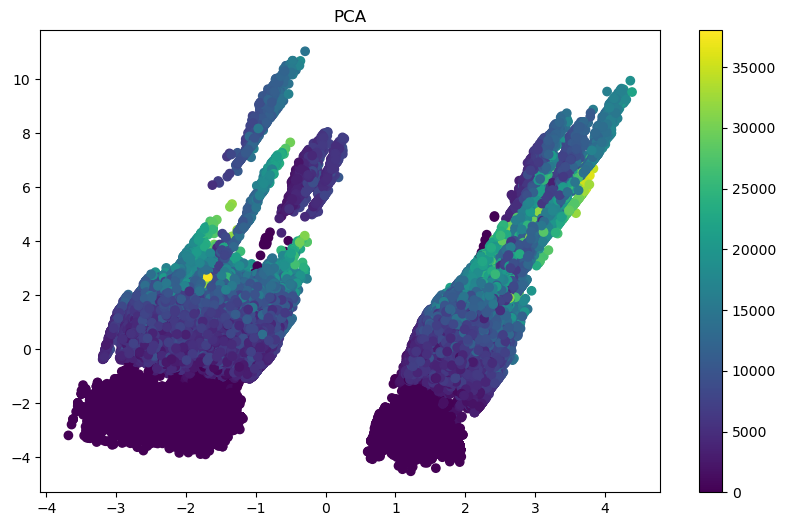

PCA applied successfully.


In [14]:
# Apply PCA
try:
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(X_train_scaled)
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train, cmap='viridis')
    plt.title('PCA')
    plt.colorbar()
    plt.show()
    print("PCA applied successfully.")
except Exception as e:
    print(f"Error applying PCA: {e}")



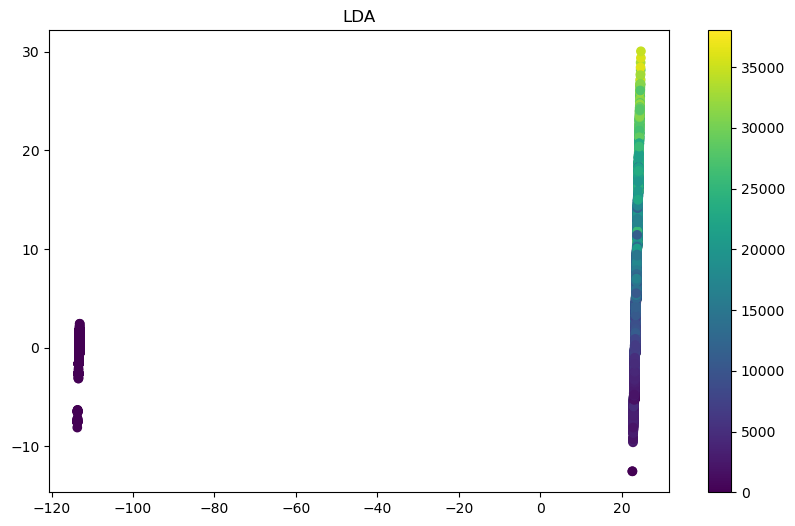

LDA applied successfully.


In [15]:
# Apply LDA
try:
    lda = LDA(n_components=2)
    lda_result = lda.fit_transform(X_train_scaled, y_train)
    plt.figure(figsize=(10, 6))
    plt.scatter(lda_result[:, 0], lda_result[:, 1], c=y_train, cmap='viridis')
    plt.title('LDA')
    plt.colorbar()
    plt.show()
    print("LDA applied successfully.")
except Exception as e:
    print(f"Error applying LDA: {e}")

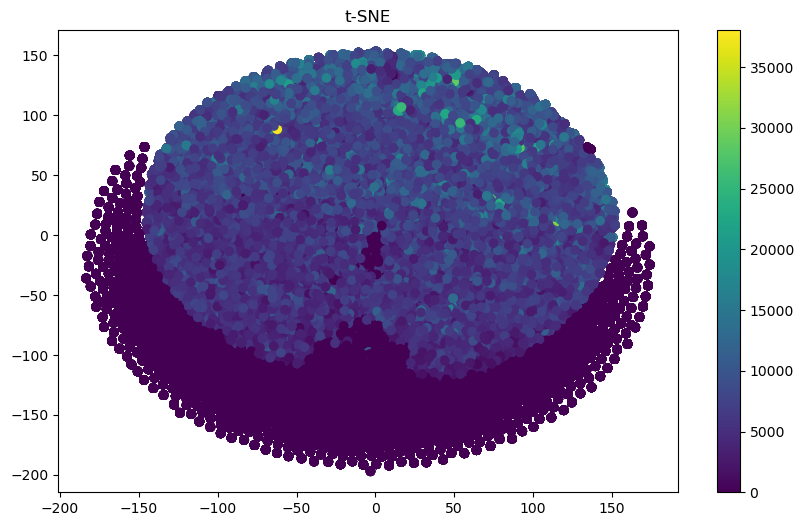

t-SNE applied successfully.


In [16]:
# Apply t-SNE
try:
    tsne = TSNE(n_components=2)
    tsne_result = tsne.fit_transform(X_train_scaled)
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_train, cmap='viridis')
    plt.title('t-SNE')
    plt.colorbar()
    plt.show()
    print("t-SNE applied successfully.")
except Exception as e:
    print(f"Error applying t-SNE: {e}")
    

In [17]:
# Build regression models for each feature set
def build_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

try:
    feature_sets = [feature_set_1, feature_set_2, feature_set_3]
    feature_set_names = ['Feature Set 1', 'Feature Set 2', 'Feature Set 3']

    for i, feature_set in enumerate(feature_sets):
        X_train_fs = feature_set
        if i == 2:
            X_test_fs = X_test_scaled
        else:
            X_test_fs = X_test_scaled[:, i*10:(i+1)*10]
        mae, mse, r2 = build_and_evaluate_model(X_train_fs, X_test_fs, y_train, y_test)
        print(f'{feature_set_names[i]} - MAE: {mae}, MSE: {mse}, R2: {r2}')
except Exception as e:
    print(f"Error building and evaluating models: {e}")


Feature Set 1 - MAE: 982.3324377813209, MSE: 2132978.379674487, R2: 0.8561946386949612
Feature Set 2 - MAE: 2693.19117276504, MSE: 13308002.93478503, R2: 0.10277469827081065
Feature Set 3 - MAE: 872.7754834778134, MSE: 1476696.0428995066, R2: 0.9004411812091164


In [ ]:
# Feature Set 3 is the best-performing set due to its higher R2 and lower MAE and MSE, 
# which indicates better model performance and the most precise predictions for the target variable.
# Feature Set 1 performs well, but it is not as good as Feature Set 3.
# Feature Set 2 performs poorly which indicates that it may not be a good choice for the regression model.